In this code, 
1) we import raster data as our agents' environment;
2) let our created agents interact with it- move around it, eat and and store eaten from the environment -
 using the Agent class methods stored in agentframework(more details about the methods in agentframework.py)
3) we write out the changed environment to the file. 

@author: Mira
version: 1.0

Agents' initial coords: agent_id = 0, store = 0, x=215, y=197
Agents' initial coords: agent_id = 1, store = 0, x=132, y=20
Agents' initial coords: agent_id = 2, store = 0, x=248, y=261
Agents' initial coords: agent_id = 3, store = 0, x=155, y=207
Agents' initial coords: agent_id = 4, store = 0, x=183, y=244
Agents' initial coords: agent_id = 5, store = 0, x=111, y=298
Agents' initial coords: agent_id = 6, store = 0, x=71, y=258
Agents' initial coords: agent_id = 7, store = 0, x=71, y=144
Agents' initial coords: agent_id = 8, store = 0, x=128, y=48
Agents' initial coords: agent_id = 9, store = 0, x=75, y=272
Agents' coords after moving around: agent_id = 0, store = 80, x=215, y=257
Agents' coords after moving around: agent_id = 1, store = 70, x=172, y=30
Agents' coords after moving around: agent_id = 2, store = 0, x=68, y=141
Agents' coords after moving around: agent_id = 3, store = 0, x=145, y=257
Agents' coords after moving around: agent_id = 4, store = 80, x=203, y=224
Agents' coords

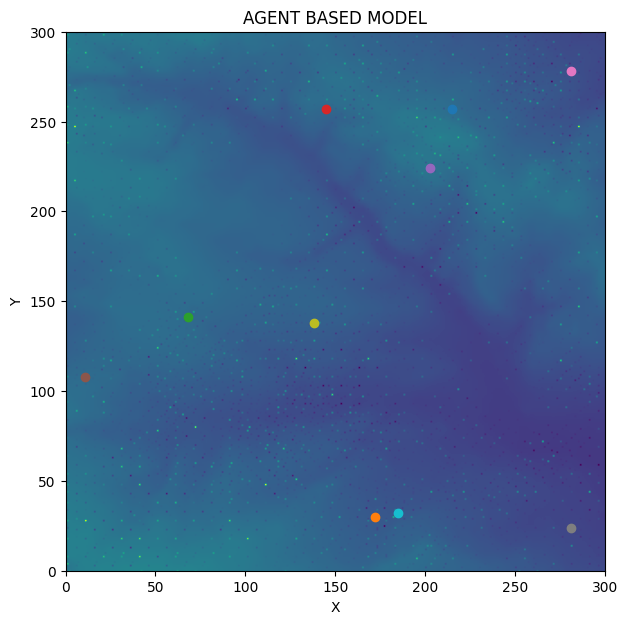

time = 0.765625


In [5]:
#import necessary libraries
import matplotlib.pyplot #for plotting
import time  #to check time
import agentframework   # module that stores Agent class
import csv  #to read and write csv files

#custom function(s)
def distance_between(agents_row_a, agents_row_b):
    """
    Calculate the euclidean distance between two agents

    Parameters
    ----------
    agents_row_a : list
        The coord-s of agent #1.
    agents_row_b : list
        The coord-s of agent #2.

    Returns
    distance between two agents
    TYPE float 

    """
    return (((agents_row_a.x - agents_row_b.x)**2) +
    ((agents_row_a.y - agents_row_b.y)**2))**0.5


#check how long it takes to run code
start = time.process_time()

#Open data file and fill 'environment' list with the data
in_data=open('data.txt', newline='')  #raster data, where each value is the equivalent to a pixel in an image
reader = csv.reader(in_data, quoting=csv.QUOTE_NONNUMERIC)

#Fill 'environment' list with the data using for loops
environment = []
for row in reader:
    rowlist = []
    for value in row:
        rowlist.append(value)
    environment.append(rowlist)

in_data.close() # Close once you are done with the reader


# Create list of agents
agents=[]

#Set number of agents, iterations
num_of_agents = 10
num_of_iterations=1000

#Create 100 agents with their random coord-s
for i in range(num_of_agents):
    agents.append(agentframework.Agent(i, agents, environment))
    print("Agents' initial coords:", agents[i]) #check the starting locations of the agents

#Move the agents around for number of iterations
for j in range(num_of_iterations):
    for i in range(num_of_agents):
        agents[i].move()
        agents[i].eat()

# Check the new locations of the agents
for i in range(num_of_agents):
    print("Agents' coords after moving around:", agents[i]) 

#Test distance between agents
for agents_row_a in agents:
    for agents_row_b in agents:
        distance = distance_between(agents_row_a, agents_row_b)

#Plot the agent locations within environment
matplotlib.pyplot.figure(figsize=(7, 7))
matplotlib.pyplot.ylim(0, len(environment[1]))
matplotlib.pyplot.xlim(0, len(environment[0]))
matplotlib.pyplot.ylabel('Y')
matplotlib.pyplot.xlabel('X')
matplotlib.pyplot.title('AGENT BASED MODEL')
matplotlib.pyplot.imshow(environment)
for i in range(num_of_agents):
        matplotlib.pyplot.scatter(agents[i].x, agents[i].y)
matplotlib.pyplot.show()

#Check time taken
end = time.process_time()
print("time = " + str(end - start))


#1.Write the resulting environment file
with open("dataout.txt", "w") as f:   
    for line in environment:
        for value in line:
            f.write(str(value) + " ")
        f.write("\n")


# for i in range(num_of_agents):
#     agents[i].get_x()

